In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
np.random.seed(132)
from functools import lru_cache

import sys

CODE_PATH = '../code'

sys.path.append(CODE_PATH)
import functions


from sklearn.datasets import load_iris, load_boston, load_breast_cancer, load_wine, load_digits
from scipy.optimize import minimize
from tqdm import tqdm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


бостон - градиент уходит в 0  
ирис - спустя пару итераций в 0

In [3]:
dataset = load_breast_cancer()
# dataset = load_boston()
df = pd.DataFrame(dataset['data'])
target = dataset['target']
df = (df - df.mean())/(df.max() - df.min())
df0 = df.copy()
print(df.shape)
print(target)
df.head()

(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.182815,-0.301307,0.213053,0.146813,0.198968,0.531437,0.495081,0.487976,0.306758,0.335139,...,0.324113,-0.222474,0.385173,0.279792,0.196998,0.399079,0.351207,0.518192,0.335156,0.229268
1,0.304923,-0.051392,0.282848,0.284671,-0.104905,-0.078833,-0.004450,0.105621,0.000193,-0.129057,...,0.310239,-0.060427,0.256680,0.264308,-0.056585,-0.065649,-0.024432,0.245339,-0.029717,0.033282
2,0.263274,0.066295,0.262808,0.232497,0.119524,0.170416,0.254453,0.392549,0.129991,-0.059132,...,0.259723,-0.003924,0.225304,0.203602,0.079452,0.165163,0.142341,0.441216,0.140399,0.023837
3,-0.128132,0.036874,-0.099434,-0.114014,0.416536,0.550761,0.357546,0.279726,0.396657,0.729621,...,-0.048353,0.021929,-0.041791,-0.076898,0.511335,0.593799,0.331239,0.491044,0.736693,0.584115
4,0.291671,-0.167388,0.298051,0.272369,0.035567,0.087292,0.255859,0.275253,-0.001323,-0.083564,...,0.223081,-0.240065,0.223810,0.170669,0.033226,-0.047797,0.102086,0.164583,-0.105806,-0.047001


In [4]:
num_nan_cols = 2
nan_fraction = 0.3
nan_cols = np.random.random_integers(0, df.shape[1] - 1, num_nan_cols)
# print(df.isnull().mean())
for col in set(nan_cols):
    df.loc[df.sample(int(nan_fraction * len(df))).index, col] = np.nan
# print(df.isnull().mean())
# print(df.isnull().mean())

/Users/kek/mlenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(0, 29 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
nan_coords = np.array(np.where(df.isnull().values)).T
print('Num nan places: {}'.format(nan_coords.shape[0]))

Num nan places: 340


Считаем по каждой паре i_1 i_2 из coords градиент

In [6]:
df1 = df.loc[:, df.isnull().sum() == 0]
df2 = df.fillna(df.mean())
print(df1.shape, df2.shape)
arr_nan = df.values
arr_raw = df0.values # исходные
arr_known = df1.values # суженные до известных признаков
arr_pred = df2.values # текущие предсказанные 
# print(arr0.shape, arr1.shape, arr2.shape)
# print(np.isnan(arr0).sum(), np.isnan(arr1).sum(), np.isnan(arr2).sum())

(569, 28) (569, 30)


# Пилим необходимые функции

df - исходная с прочерками    
df0 - копия исходной таблицы без прочерков  
df1 - сокращенная до ненулевых признаков  
df2 - исходная с восстановленными  
arr0,arr1,arr2 аналогично

In [7]:
# ищем для каждого объекта соседей (по известным признакам или по всем?). Наверное по всем
# выбираем пропуск
# считаем среднее значение по всем соседям
# делаем сдвиг
from sklearn.neighbors import NearestNeighbors
k = 3
nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(arr_pred)

In [24]:
# xt += teta(mean - xt-1)
def get_delta_vec():
    teta = 0.1
    deltas = []
    _, heighbours = nbrs.kneighbors(arr_pred)
    for i, j in nan_coords:
        mean_neigh = arr_pred[heighbours[i]].mean(axis=0)[j]
        deltas.append(teta*(mean_neigh - arr_pred[i][j]))
    return np.array(deltas)

Тестовый прогон

# Iterative process

In [29]:
max_iter = 100
maes = []
msqes = []
for i in range(max_iter):
    deltas = get_delta_vec()
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(arr_pred) # пересчитываем
    for j, (x,y) in enumerate(nan_coords):
        arr_pred[x, y] += deltas[i]
        
    mae = functions.get_mae(arr_raw, arr_pred, nan_coords)
    msqe = functions.get_msqe(arr_raw, arr_pred, nan_coords)
    
    maes.append(mae)
    msqes.append(msqe)
    print('\tIteration {}  mae {:.6} // rmse {:.6} '.format(i+1, mae, msqe))

	Iteration 1  mae 0.143407 // rmse 0.0290213 
	Iteration 2  mae 0.143538 // rmse 0.0290651 
	Iteration 3  mae 0.145535 // rmse 0.0297416 
	Iteration 4  mae 0.144018 // rmse 0.0292271 
	Iteration 5  mae 0.1548 // rmse 0.0330899 
	Iteration 6  mae 0.152044 // rmse 0.0320564 
	Iteration 7  mae 0.152044 // rmse 0.0320564 
	Iteration 8  mae 0.152074 // rmse 0.0320674 
	Iteration 9  mae 0.153302 // rmse 0.0325251 
	Iteration 10  mae 0.157322 // rmse 0.0340395 
	Iteration 11  mae 0.155155 // rmse 0.0332229 
	Iteration 12  mae 0.155307 // rmse 0.0332793 
	Iteration 13  mae 0.155307 // rmse 0.0332793 
	Iteration 14  mae 0.155316 // rmse 0.0332823 
	Iteration 15  mae 0.154607 // rmse 0.0330171 
	Iteration 16  mae 0.151373 // rmse 0.0318089 
	Iteration 17  mae 0.155115 // rmse 0.033208 
	Iteration 18  mae 0.154847 // rmse 0.0331075 
	Iteration 19  mae 0.154847 // rmse 0.0331075 
	Iteration 20  mae 0.154847 // rmse 0.0331075 
	Iteration 21  mae 0.1507 // rmse 0.0315635 
	Iteration 22  mae 0.151407

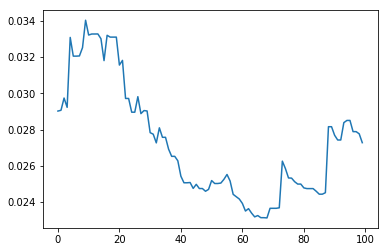

In [31]:
plot(msqes)

In [ ]:
grad